# Exploratort Data Analysis Using Pandas

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The following line of code enables Jupyter notebook for 
# IPython to display matplotlib graphs

%matplotlib inline

### Reading the data from CSV file

In [3]:
# read the data

sales = pd.read_csv("sales_data.csv", parse_dates = ['date'])
sales.head()

,Unnamed: 0,account.number,name,sku,category,quantity,unit.price,ext.price,date
0,1,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,2,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,3,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,4,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,5,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [4]:
sales.describe()

,Unnamed: 0,account.number,quantity,unit.price,ext.price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,535208.897000,10.328000,56.179630,579.84390
std,288.819436,277589.746014,5.687597,25.331939,435.30381
min,1.000000,93356.000000,1.000000,10.060000,10.38000
25%,250.750000,299771.000000,5.750000,35.995000,232.60500
50%,500.500000,563905.000000,10.000000,56.765000,471.72000
75%,750.250000,750461.000000,15.000000,76.802500,878.13750
max,1000.000000,995267.000000,20.000000,99.970000,1994.80000


We can learn that:

* The customers on average purchases 10 items per transaction
* The average cost of the transaction is $579

In [5]:
sales['unit.price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit.price, dtype: float64

In [6]:
sales.dtypes

Unnamed: 0                 int64
account.number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit.price               float64
ext.price                float64
date              datetime64[ns]
dtype: object

### Plotting Some Data

In [7]:
customers = sales[['name', 'ext.price', 'date']]

In [8]:
customers.head()

,name,ext.price,date
0,Carroll PLC,578.24,2014-09-27 07:13:03
1,Heidenreich-Bosco,1018.78,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",289.92,2014-03-01 10:51:24
3,Waters-Walker,413.40,2013-11-17 20:41:11
4,Waelchi-Fahey,1793.52,2014-01-03 08:14:27


In [9]:
customers.shape

(1000, 3)

### How many transactions each customer had?

In [10]:
# Let's see how many transactions each customer had.. 
# In R we used group_by, and here we can do the same

# first we do the grouping 
customer_group = customers.groupby('name')

# find the number of enteries in each group
customer_group.size()

name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upton and Breitenberg    59
Volkman, Goyette and Lemke       48
Waelchi-Fahey                    54
Waters-Walker                    50
dtype: int64

### How much did each customer pay in total? Arrange the dataframe in increasing order.

In [11]:
sales_total = customer_group.sum(columns = 'ext.price')

In [12]:
sales_total.head()

,ext.price
name,
Berge LLC,30064.87
Carroll PLC,35934.31
Cole-Eichmann,30435.42
"Davis, Kshlerin and Reilly",19054.76
"Ernser, Cruickshank and Lind",28089.02


In [13]:
# arrange
sales_total.sort_values(by = 'ext.price').head()

,ext.price
name,
"Davis, Kshlerin and Reilly",19054.76
Huel-Haag,21087.88
Gorczany-Hahn,22207.90
Hamill-Hackett,23433.78
Heidenreich-Bosco,25428.29


### Create a bar chart to show the distribution of total sales for all customers.

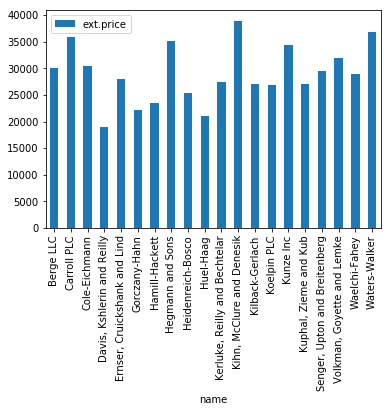

In [14]:
sales_plot = sales_total.plot(kind = 'bar')

We can improve the above chart:

* sort the data
* remove legend
* add title
* label axis

Text(0,0.5,'Sales ($)')

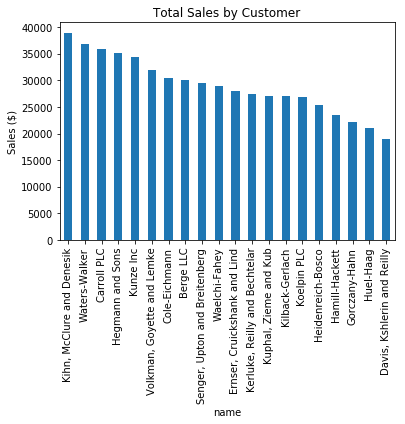

In [15]:
sales_plot = sales_total.sort_values(by = 'ext.price', ascending = False).\
plot(kind='bar',legend=None,title="Total Sales by Customer")

sales_plot.set_ylabel("Sales ($)")

### Sales break by category

In [16]:
customers = sales[['name', 'category','ext.price']]
customers.head()

,name,category,ext.price
0,Carroll PLC,Belt,578.24
1,Heidenreich-Bosco,Shoes,1018.78
2,"Kerluke, Reilly and Bechtelar",Shirt,289.92
3,Waters-Walker,Shirt,413.40
4,Waelchi-Fahey,Shirt,1793.52


In [17]:
category_group = customers.groupby(by = ['name', 'category']).sum(columns = "ext.price")
category_group.head()

ext.price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61

In [18]:
# In order to be able to visualize the above data, we need to unstack it
category_group.unstack().head()

ext.price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  14528.01   7794.71
Davis, Kshlerin and Reilly     1604.13   7533.03   9917.60
Ernser, Cruickshank and Lind   5894.38  16944.19   5250.45

Text(0,0.5,'Sales')

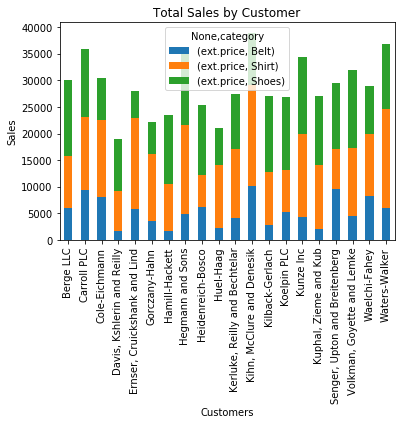

In [19]:
sales_plot = category_group.unstack().plot(kind = 'bar', stacked = True, \
                              title = "Total Sales by Customer")

sales_plot.set_xlabel("Customers")
sales_plot.set_ylabel("Sales")

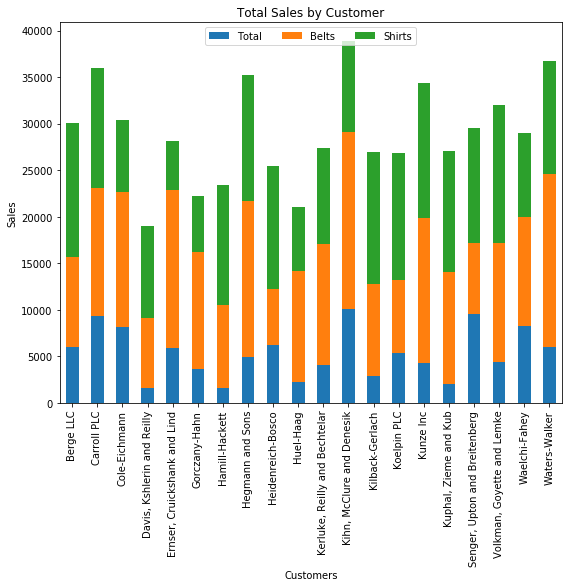

In [20]:
sales_plot = category_group.unstack().plot(kind = 'bar', stacked = True, \
                              title = "Total Sales by Customer", figsize=(9, 7))

sales_plot.set_xlabel("Customers")
sales_plot.set_ylabel("Sales")

sales_plot.legend(["Total", "Belts", "Shirts", "Shoes"], loc = 9, ncol = 4)

### Create a histogram to understand the distribution of purchasing patterns

In [21]:
purchase_patterns = sales[['ext.price', 'date']]
purchase_patterns.head()

,ext.price,date
0,578.24,2014-09-27 07:13:03
1,1018.78,2014-07-29 02:10:44
2,289.92,2014-03-01 10:51:24
3,413.40,2013-11-17 20:41:11
4,1793.52,2014-01-03 08:14:27


Text(0,0.5,'Number of Orders')

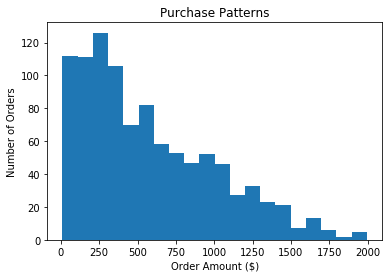

In [22]:
purchase_plot = purchase_patterns['ext.price'].plot(kind = "hist", bins = 20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount ($)")
purchase_plot.set_ylabel("Number of Orders")

### Do we have certain months that are busier than others?

If we want to analyze the data by date, we need to set the date column 
as the index using `set_index()` command.

In [23]:
purchase_patterns = purchase_patterns.set_index("date")
purchase_patterns.head()

,ext.price
date,
2014-09-27 07:13:03,578.24
2014-07-29 02:10:44,1018.78
2014-03-01 10:51:24,289.92
2013-11-17 20:41:11,413.40
2014-01-03 08:14:27,1793.52


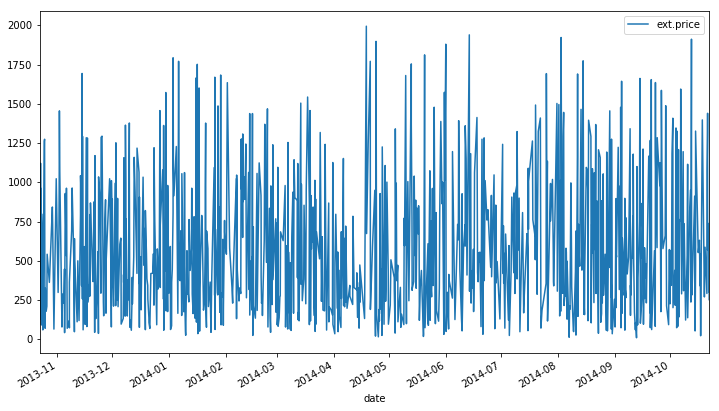

In [24]:
purchase_patterns.plot(figsize=(12, 7))

One of the cool things that pandas allows us to do is to "resample" the data. If we want to look at the data by month, we can resample, and sum it all up. In the following code, we will use `M` as the period for resampling which means the data should be resampled on a month boundary. 

In [25]:
monthly_pattern = purchase_patterns.resample("M", how = sum)

/Users/abbasssharif/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


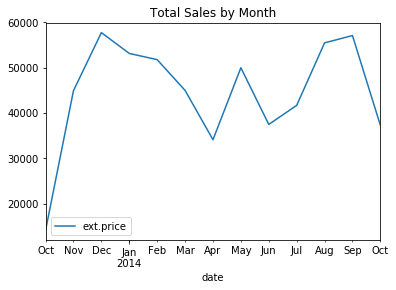

In [26]:
monthly_pattern.plot(title = "Total Sales by Month")